1. Installing Project Dependencies

In [1]:
# Install XGBoost and Gradio
!pip install -q xgboost gradio

2. Importing Essential Libraries

In [2]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Web App
import gradio as gr

3. Uploading Dataset to Colab Environment

In [3]:
from google.colab import files
uploaded = files.upload()

Saving fake_job_postings.csv to fake_job_postings.csv


4. Loading and Initial Data Inspection

In [4]:
df = pd.read_csv("fake_job_postings.csv", on_bad_lines='skip')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


5. Initial Data Exploration and Distribution Analysis

Shape of dataset: (17880, 18)

Missing values:
 job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

Fake vs Real distribution:
 fraudulent
0    17014
1      866
Name: count, dtype: int64


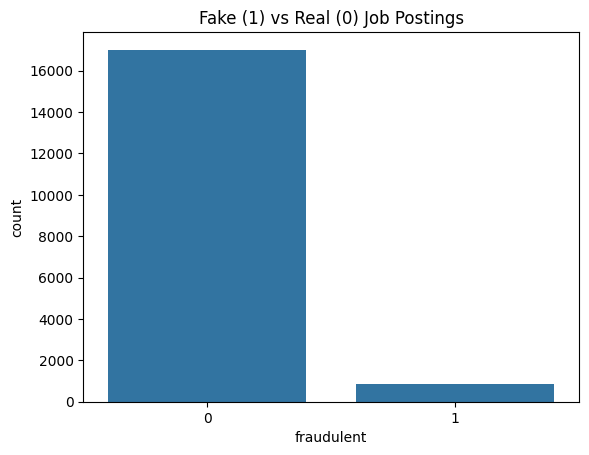

In [5]:
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nFake vs Real distribution:\n", df['fraudulent'].value_counts())
sns.countplot(x='fraudulent', data=df)
plt.title("Fake (1) vs Real (0) Job Postings")
plt.show()

6. Data Preprocessing: Feature Selection and Text Combination

In [6]:
df = df[['title', 'description', 'requirements', 'fraudulent']]
df = df.dropna()

# Combine text features into one
df['text'] = df['title'] + ' ' + df['description'] + ' ' + df['requirements']
df = df[['text', 'fraudulent']]  # keep only what we need
df.head()

,text,fraudulent
0,"Marketing Intern Food52, a fast-growing, James...",0
1,Customer Service - Cloud Video Production Orga...,0
2,Commissioning Machinery Assistant (CMA) Our cl...,0
3,Account Executive - Washington DC THE COMPANY:...,0
4,Bill Review Manager JOB TITLE: Itemization Rev...,0


In [7]:
X = df['text']
y = df['fraudulent']

# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [9]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    print(f"\n🧪 Training {name}...")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }


🧪 Training Logistic Regression...
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2876
           1       0.98      0.27      0.43       161

    accuracy                           0.96      3037
   macro avg       0.97      0.64      0.70      3037
weighted avg       0.96      0.96      0.95      3037

Confusion Matrix:
 [[2875    1]
 [ 117   44]]

🧪 Training Random Forest...
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2876
           1       0.97      0.48      0.64       161

    accuracy                           0.97      3037
   macro avg       0.97      0.74      0.81      3037
weighted avg       0.97      0.97      0.97      3037

Confusion Matrix:
 [[2874    2]
 [  84   77]]

🧪 Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:59:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2876
           1       0.98      0.55      0.71       161

    accuracy                           0.98      3037
   macro avg       0.98      0.78      0.85      3037
weighted avg       0.98      0.98      0.97      3037

Confusion Matrix:
 [[2874    2]
 [  72   89]]


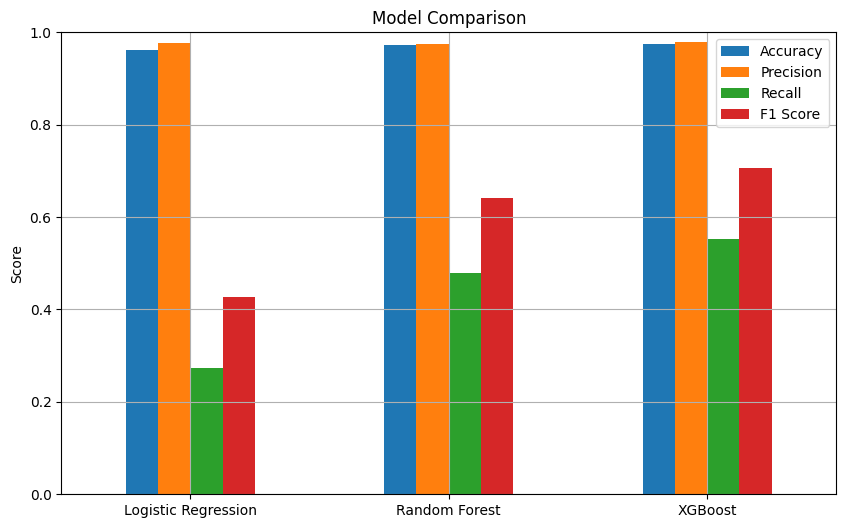

In [10]:
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(10,6), ylim=(0,1))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [11]:
# Compute class weights
num_real = sum(df['fraudulent'] == 0)
num_fake = sum(df['fraudulent'] == 1)
scale_weight = num_real / num_fake

final_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_weight,  # handles imbalance
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1
)

In [12]:
final_vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=7000,
    ngram_range=(1, 2)  # unigrams + bigrams
)

In [13]:
final_vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=3000,     # Try 3000 instead of 7000
    ngram_range=(1, 2)
)

In [14]:
from sklearn.model_selection import train_test_split

X_train_text, _, y_train, _ = train_test_split(df['text'], df['fraudulent'], test_size=0.2, random_state=42)

X_train_vec = final_vectorizer.fit_transform(X_train_text)
final_model.fit(X_train_vec, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:02:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [15]:
final_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_weight,
    n_estimators=100,      # Was 300
    max_depth=4,           # Was 6
    learning_rate=0.15     # Slightly faster learning
)

In [16]:
# Sample split
X_train_text, _, y_train, _ = train_test_split(df['text'], df['fraudulent'], test_size=0.2, random_state=42)

# Vectorizer
final_vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=3000,
    ngram_range=(1, 2)
)

X_train_vec = final_vectorizer.fit_transform(X_train_text)

# Model
final_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_weight,
    n_estimators=100,
    max_depth=4,
    learning_rate=0.15
)

# Train fast
final_model.fit(X_train_vec, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:05:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [17]:
import gradio as gr
import numpy as np

# List of common fake job red flags
fake_clues = [
    ("work from home", "too-good-to-be-true remote offer"),
    ("quick money", "promises of fast cash"),
    ("no experience", "low requirement for suspicious job"),
    ("limited positions", "pressure tactics"),
    ("click here", "external links in job post"),
    ("urgent hiring", "unusual urgency"),
    ("training fee", "asks for money upfront"),
    ("send cv via whatsapp", "non-standard hiring method"),
]

def analyze_fakeness(text):
    text_lower = text.lower()
    for clue, reason in fake_clues:
        if clue in text_lower:
            return f"🧠 Reason: Suspicious due to '{reason}'."
    return "🧠 Reason: Language and structure match known fake patterns."

def predict_job(text):
    vec = final_vectorizer.transform([text])
    pred_prob = final_model.predict_proba(vec)[0]
    pred = np.argmax(pred_prob)
    confidence = pred_prob[pred]
    label = "Fake Job Posting" if pred == 1 else "Real Job Posting"

    tag = ""
    if pred == 1:
        tag = analyze_fakeness(text)

    bar = "█" * int(confidence * 20)
    conf_display = f"{label} (Confidence: {confidence:.2f})\n\nConfidence Meter:\n{bar}"

    return f"🔍 {conf_display}\n\n{tag}"

interface = gr.Interface(
    fn=predict_job,
    inputs=gr.Textbox(lines=10, placeholder="Paste a job description here..."),
    outputs="text",
    title="🔎 Smart Fake Job Detector",
    description="🚫 Enter a job posting to check if it's FAKE or REAL. Get instant analysis with confidence level and reason."
)

interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://778f0b0b782b5a4699.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
